##### Problem Statement
    Lith-ion Power is the largest producer of electric vehicle (e-vehicle) batteries. They provide batteries on rent to e-vehicle drivers. Drivers rent a battery typically for a day and thereafter replacing it with a charged battery from the company.
    Lith-ion Power has a variable pricing model based on the driver's driving history. Battery life depends on factors such as over speeding, distance driven per day, etc.
        You are supposed to create a cluster model where drivers can be grouped together based on a driving data and group the data points so that drivers will be incentivized based on the cluster.

In [1]:
# Import required libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set
driver = pd.read_csv(r'C:\Users\Jordi\OneDrive\Documents\EDUCATION\SIMPLILEARN\Artificial Intelligence Master Program\MACHINE LEARNING\SELF LEARNING\Lesson 7\Datasets\driver-data.csv')

In [3]:
# View first rows
driver.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
# Checking missing values
driver.isna().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [5]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
# General statictics
driver.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
# Define the features
features = driver.drop(columns='id', axis=1)

# Import KMeans
from sklearn.cluster import KMeans

# Instantiate the function
kmeans = KMeans(n_clusters=2)

# Fit the data
kmeans.fit(features)

KMeans(n_clusters=2)

In [8]:
# Determine the clusters centers vectors
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [9]:
# Print the labels and length of labels
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [13]:
# Let's check how many unique drivers are in the 1st and the 2nd clusters
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


**Plot the data**

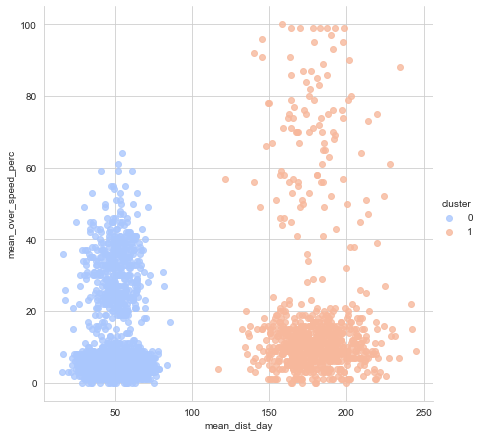

In [14]:
# Set the theme as white grid
sns.set_style('whitegrid')

driver['cluster'] = kmeans.labels_

sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=driver, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

    We can see from the graph plotted that there are 2 clusters : 
    - one centered around 50 mean
    - the other around 175
    There are more drivers in the cluster centered at 175

    Since KMeans clustering gives optimum results when iterated multiple times, let's try out the same with increasing the number of clusters, say 4 :

In [15]:
# Instantiate the function
kmeans_4 = KMeans(n_clusters=4)
# Fit the data
kmeans_4.fit(features)
# Print the clusters centers with 4 clusters and track the 4 unique labels
print(kmeans_4.cluster_centers_)
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)
print(dict(zip(unique, counts)))

[[ 50.46127059  32.42823529]
 [180.34311782  10.52011494]
 [ 49.98428468   5.21441441]
 [177.83509615  70.28846154]]
{0: 425, 1: 696, 2: 2775, 3: 104}


    We can now see the difference in the clusters' centers. We also have a distribution of data points in each cluster.
    Let's plot it :

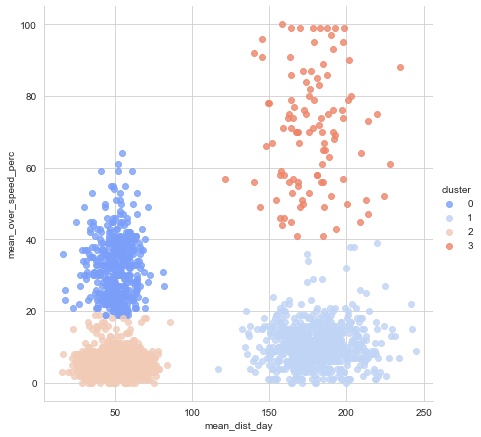

In [16]:
# Set the theme as white grid
sns.set_style('whitegrid')

driver['cluster'] = kmeans_4.labels_

sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=driver, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)